# Data Analysis

### Instructions how so use this notebook:

- First of all you need to run every cell in the first section. This will create important variables, functions, dataframes and so on. Without it the rest of the code doesn´t work!
- In the second section you will find lots of subsections. Every subsection has a titel which gives information about what you can do in this part. Also every subsection has a "Choose for yourself!" area. The following code is writen with "input functions", which means that you can give an choosen input of a special column and get the wished reluts shown. Please read the comments, instructions, titels of pictures and x/y axes in the "Choose for yourself!" area cearfully, so you can be sure that you get what you want. Don´t be afraid you can´t destroy something as long as you just run the code and didn´t change it. 
- If you create a figure you can find it in the Pictures folder. (Picture names have the following name pattern: "name of the figure"_"column or variable name".jpg )
- Following you can see a list with the column names of the Uni4U Dataset and a description of what the data in the column means.

Have fun and best luck by your University decision! :D

### Data sources:
- [University Data (2015)](https://www.kaggle.com/mylesoneill/world-university-rankings)
- [Appartment Data (2019)](https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany)
- [Population Data (2021)](https://www.kaggle.com/berkayalan/deutschland-cities)

##### Note: 
Please be aware that this notebook should only give you some hints and support your search for the right University. It is not the only tool you should use especially because our data is from different past years. So naturally today there could be other values in place. But you should get a good overview which can help you by your continuing search.

### Column names
- 
- 
- 
- 

Ideas for anaysis:
- Boxplots for rentprices per city
- Bar charts for rent prices
- (Comparison of baseRent/totalRent/service)
- Heatmap germany with the citys and the rentprices
- ...
- ...
- 
- (Setting base values for the input)
- Funktions for input

- 

### 1. Reading in the Data <a class="anchor" id="first-bullet"></a>


In [1]:
#Initialising the needed libaries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 



In [2]:
#Setting the option that all columns are shown.
pd.set_option('display.max_columns', 100)

In [3]:
#Data from the Main-Dataset
Uni4U_Data = pd.read_csv(r"data/Uni4U_final.csv")

In [43]:
#Deleting the index column which was automatically created by the data creation.
Uni4U_Data.drop(columns=["Unnamed: 0"], inplace=True)


In [4]:
#Data with just raw the University information
uni_only_adjusteddata = pd.read_excel(r"data\Adjusted_University_Data.xlsx")   

In [5]:
#Data with just raw Appartment information
appartments_only_adjusteddata = pd.read_excel(r"data\Adjusted_Appartment_Data.xlsx")

In [6]:
#Data with only the raw Population information
population_only_adjusteddata=pd.read_excel(r"data\Adjusted_Population_Data.xlsx")

We add the raw data from each file in case somebody wants to compare or take a look at something. We will not use it or take into account.

In [7]:
#Data with only the raw Population information
population_only_rawdata=pd.read_csv(r"data/Deutschland_Cities.csv")
#population_data=pd.read_csv(r"\Users\jaho3\Downloads\TechLabs\TechLabs\Deutschland_Cities.csv")

In [8]:
#Data with just raw Appartment information
#appartments = pd.read_csv(r"\Users\jaho3\Downloads\archive (3)\immo_data.csv", usecols = ['regio1','serviceCharge','balcony','telekomUploadSpeed','totalRent', "yearConstructed", "hasKitchen","cellar", "baseRent","livingSpace","petsAllowed", "lift","noRooms", "garden", "regio2", "regio3" ])
appartments_only_rawdata = pd.read_csv(r"data/immo_data.csv")

In [9]:
#Data with just raw the University information
#data = pd.read_csv(r"\Users\jaho3\OneDrive\Documents\group-3\archive\cwurData.csv")#, usecols = ['world_rank',"institution","country", "national_rank", "quality_of_education", "quality_of_faculty", "year"])   
uni_only_rawdata = pd.read_csv(r"data\cwurData.csv")   

##### 1.1. Input-Functions

In [10]:
#This function will ask for a city name. If the city name does not exists then there will be an error message.
def input_city_adjusted():
    city=input("Please enter a city name")
    city=str(city)
    

    if city in Uni4U_Data["city"].unique():
        return city
    elif city in appartments_only_adjusteddata["regio2"].unique():
        return city
    elif city in population_only_adjusteddata["city"].unique():
        return city
    elif city in uni_only_adjusteddata["city"].unique():
        return city

    else:
        city="Hamburg" #Select a standard value so the code can always run.
        print("Oh no! Looks like there was a Problem. Please try again! Make sure you wirte the city correct")
        return city
    

In [11]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_uni4u_column_adjusted():
    ux=input("Please enter a column name from the Uni4U Dataset.")
    
    

    if ux in Uni4U_Data.columns:
        return ux

    else:
        ux="totalRent_median" #Select a standard value so the code can always run.
        print("Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.")
        return ux

In [12]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_appartment_column_adjusted():
    ax=input("Please enter a column name from the appartments_only_adjusteddata Dataset.")
    
    if ax in appartments_only_adjusteddata.columns:
        return ax

    else:
        ax="totalRent"
        print("Oh no! Looks like there was a Problem. totalRent has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the appartments_only_adjusteddata Dataset.")
        return ax

In [13]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_population_column_adjusted():
    px=input("Please enter a column name from the population_only_adjusteddata Dataset.")
    
    if px in population_only_adjusteddata.columns:
        return px

    else:
        px="population"
        print("Oh no! Looks like there was a Problem. population has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the population_only_adjusteddata Dataset.")
        return px

In [14]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_uniad_column_adjusted():
    uax=input("Please enter a column name from the uni_only_adjusteddata Dataset.")
    
    if uax in uni_only_adjusteddata.columns:
        return uax

    else:
        uax="national_rank"
        print("Oh no! Looks like there was a Problem. national_rank has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the uni_only_adjusteddata Dataset.")
        return uax

### 2. Analysing the Data

##### 2.1. Basic information

In [15]:
#Here we get all the column names.
Uni4U_Data.columns

Index(['Unnamed: 0', 'old_index', 'world_rank', 'institution', 'country',
       'national_rank', 'quality_of_education', 'quality_of_faculty', 'year',
       'city', 'totalRent_mean', 'totalRent_median', 'serviceCharge_mean',
       'serviceCharge_median', 'baseRent_mean', 'baseRent_median',
       'livingSpace_mean', 'livingSpace_median', 'noRooms_mean',
       'noRooms_median', 'hasKitchen_percentage', 'cellar_percentage',
       'lift_percantage', 'garden_percentage', 'telekomUploadSpeed_mean',
       'telekomUploadSpeed_median', 'yearConstructed_mean',
       'yearConstructed_median', 'petsAllowed_negotiable', 'petsAllowed_no',
       'petsAllowed_yes', 'population_per_city'],
      dtype='object')

In [16]:
#Shows the count of rows and columns
Uni4U_Data.shape

(115, 32)

In [17]:
#Here we get information about the data type for each column
Uni4U_Data.dtypes

Unnamed: 0                     int64
old_index                      int64
world_rank                     int64
institution                   object
country                       object
national_rank                  int64
quality_of_education           int64
quality_of_faculty             int64
year                           int64
city                          object
totalRent_mean               float64
totalRent_median             float64
serviceCharge_mean           float64
serviceCharge_median         float64
baseRent_mean                float64
baseRent_median              float64
livingSpace_mean             float64
livingSpace_median           float64
noRooms_mean                 float64
noRooms_median               float64
hasKitchen_percentage        float64
cellar_percentage            float64
lift_percantage              float64
garden_percentage            float64
telekomUploadSpeed_mean      float64
telekomUploadSpeed_median    float64
yearConstructed_mean         float64
y

In [18]:
#Gives the maximum value for each column.
Uni4U_Data.max()

Unnamed: 0                                 114
old_index                                 2101
world_rank                                 966
institution                  University of Ulm
country                                Germany
national_rank                               55
quality_of_education                       367
quality_of_faculty                         218
year                                      2015
city                                  Würzburg
totalRent_mean                     1904.166454
totalRent_median                        1650.0
serviceCharge_mean                  223.377314
serviceCharge_median                     200.0
baseRent_mean                      1712.898009
baseRent_median                         1490.0
livingSpace_mean                      92.77491
livingSpace_median                        93.0
noRooms_mean                          3.077828
noRooms_median                             3.0
hasKitchen_percentage                 0.787709
cellar_percen

In [19]:
#Gives the minimum value for each column.
Uni4U_Data.min()

Unnamed: 0                                                      0
old_index                                                      81
world_rank                                                     67
institution                  Albert Ludwig University of Freiburg
country                                                   Germany
national_rank                                                   1
quality_of_education                                           23
quality_of_faculty                                             51
year                                                         2012
city                                                       Aachen
totalRent_mean                                         458.504498
totalRent_median                                            420.0
serviceCharge_mean                                     110.612768
serviceCharge_median                                         92.0
baseRent_mean                                          325.567874
baseRent_m

In [20]:
#Gives the variance for each column.
Uni4U_Data.var()

C:\Users\Marek\AppData\Local\Temp/ipykernel_33820/2878915696.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Uni4U_Data.var()


Unnamed: 0                   1.111667e+03
old_index                    3.299518e+05
world_rank                   5.890860e+04
national_rank                2.719805e+02
quality_of_education         1.641846e+04
quality_of_faculty           2.477733e+03
year                         4.367658e-01
totalRent_mean               1.256743e+05
totalRent_median             1.013409e+05
serviceCharge_mean           8.308083e+02
serviceCharge_median         7.724003e+02
baseRent_mean                1.157151e+05
baseRent_median              9.614049e+04
livingSpace_mean             7.439774e+01
livingSpace_median           6.397348e+01
noRooms_mean                 2.919036e-02
noRooms_median               1.831808e-01
hasKitchen_percentage        2.823997e-02
cellar_percentage            9.610726e-03
lift_percantage              1.540958e-02
garden_percentage            2.585943e-03
telekomUploadSpeed_mean      4.511746e+01
telekomUploadSpeed_median    1.345723e+02
yearConstructed_mean         1.483

# <font color='orange'>Choose for yourself!:</font>

In [21]:
#Let you chose a column and shows you every unique value.
Uni4U_Data[input_uni4u_column_adjusted()].unique()

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


array([1290.  , 1650.  , 1000.  , 1550.  , 1124.  , 1058.  , 1400.  ,
        696.  , 1233.  , 1035.  ,  912.  ,  990.  ,  870.  ,  682.  ,
        620.  ,  735.  ,  975.  , 1065.  , 1090.  ,  828.5 ,  588.  ,
        551.  ,  602.82, 1165.  ,  927.  ,  710.  ,  627.52,  750.  ,
        650.  ,  652.  , 1100.  ,  740.8 ,  509.36,  472.  , 1026.  ,
        630.  ,  762.17,  764.93,  566.  ,  940.  ,  700.  ,  537.5 ,
        665.  ,  969.  ,  760.  ,  420.  ,  790.  ])

In [22]:
#Let you chose a column and shows you special statistical information.
Uni4U_Data[input_uni4u_column_adjusted()].describe()

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


count     115.000000
mean      928.759739
std       318.340814
min       420.000000
25%       673.500000
50%       870.000000
75%      1112.000000
max      1650.000000
Name: totalRent_median, dtype: float64

In [23]:
#Let you chose a column and only displays itself. (To show more than one column add a ", input_uni4u_column_adjusted()" after the first "input_uni4u_column_adjusted()" as often as you wish and then chose the wanted columns)
Uni4U_Data.loc[:,[input_uni4u_column_adjusted()]]

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


,totalRent_median
0,1290.0
1,1650.0
2,1650.0
3,1650.0
4,1290.0
...,...
110,1400.0
111,790.0
112,665.0
113,760.0


##### 2.2. Filtering

Here we filter the Data for specific questions

Question: Which University has the best quality of education while at the same time is located in a city where the total rent median is not more than 700€?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
   University of Göttingen
</p>
</details>  

In [24]:
#Which University has the best quality of education while at the same time is located in a city where the total rent is not more than 700€?
filt=(Uni4U_Data["totalRent_median"]<701)
Uni4U_Data[filt].sort_values(by="quality_of_education", ascending=True).head() 

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,garden_percentage,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,population_per_city
14,14,368,169,University of Göttingen,Germany,10,39,172,2014,Göttingen,802.208380,696.0,154.809463,144.0,641.816525,556.5,68.889830,65.41,2.704255,2.0,0.470922,0.453901,0.154610,0.201418,32.177134,40.0,1973.485887,1978.0,0.342466,0.614155,0.043379,119801.0
70,70,1376,177,University of Göttingen,Germany,11,43,176,2015,Göttingen,802.208380,696.0,154.809463,144.0,641.816525,556.5,68.889830,65.41,2.704255,2.0,0.470922,0.453901,0.154610,0.201418,32.177134,40.0,1973.485887,1978.0,0.342466,0.614155,0.043379,119801.0
21,21,431,232,University of Kiel,Germany,17,180,192,2014,Kiel,762.546050,682.0,119.854339,100.0,614.121678,520.0,66.652945,63.00,2.446952,2.0,0.642694,0.681507,0.237443,0.118721,26.147330,40.0,1933.686122,1959.0,0.585302,0.393701,0.020997,247548.0
76,76,1414,215,University of Kiel,Germany,17,193,198,2015,Kiel,762.546050,682.0,119.854339,100.0,614.121678,520.0,66.652945,63.00,2.446952,2.0,0.642694,0.681507,0.237443,0.118721,26.147330,40.0,1933.686122,1959.0,0.585302,0.393701,0.020997,247548.0
29,29,498,299,Leipzig University,Germany,25,308,201,2014,Leipzig,743.167133,588.0,148.101223,131.0,575.334295,433.0,72.472193,64.40,2.586845,2.0,0.241147,0.620324,0.311160,0.245761,33.154892,40.0,1951.521097,1964.0,0.754933,0.115057,0.130010,542529.0


Question: Which University has the best rank from 2015?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
    Ruprecht Karl University of Heidelberg
</p>
</details>   

In [25]:
filt=(Uni4U_Data["year"]==2015)
Uni4U_Data[filt].sort_values(by="national_rank", ascending=True).head()

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,garden_percentage,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,population_per_city
60,60,1275,76,Ruprecht Karl University of Heidelberg,Germany,1,38,51,2015,Heidelberg,1348.422541,1290.0,207.847157,200.00,1148.408448,1100.0,84.978429,85.0,2.825670,3.0,0.593870,0.653257,0.450192,0.189655,4.189318,2.4,1978.135338,1998.0,0.330218,0.635514,0.034268,160355.0
61,61,1278,79,Ludwig Maximilian University of Munich,Germany,2,42,92,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.216454,31.210324,40.0,1986.187410,1995.0,0.364355,0.595401,0.040244,1471508.0
62,62,1300,101,Technical University of Munich,Germany,3,37,177,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.216454,31.210324,40.0,1986.187410,1995.0,0.364355,0.595401,0.040244,1471508.0
63,63,1346,147,Free University of Berlin,Germany,4,76,128,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.139439,32.195063,40.0,1965.192072,1978.0,0.723240,0.224318,0.052443,3644826.0
64,64,1352,153,Humboldt University of Berlin,Germany,5,291,108,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.139439,32.195063,40.0,1965.192072,1978.0,0.723240,0.224318,0.052443,3644826.0


Question: Which University ranked in 2015 is located in Hamburg, München or Berlin and has the highest percentage on appartments with a lift?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
    Ludwig Maximilian University of Munich
</p>
</details>   

In [26]:
filt=(Uni4U_Data["year"]==2015) & (Uni4U_Data["city"]=="München") | (Uni4U_Data["year"]==2015) &(Uni4U_Data["city"]=="Hamburg") | (Uni4U_Data["year"]==2015) &(Uni4U_Data["city"]=="Berlin")  
Uni4U_Data[filt].sort_values(by="lift_percantage", ascending=False)

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,garden_percentage,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,population_per_city
61,61,1278,79,Ludwig Maximilian University of Munich,Germany,2,42,92,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.216454,31.210324,40.0,1986.187410,1995.0,0.364355,0.595401,0.040244,1471508.0
62,62,1300,101,Technical University of Munich,Germany,3,37,177,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.216454,31.210324,40.0,1986.187410,1995.0,0.364355,0.595401,0.040244,1471508.0
63,63,1346,147,Free University of Berlin,Germany,4,76,128,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.139439,32.195063,40.0,1965.192072,1978.0,0.723240,0.224318,0.052443,3644826.0
64,64,1352,153,Humboldt University of Berlin,Germany,5,291,108,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.139439,32.195063,40.0,1965.192072,1978.0,0.723240,0.224318,0.052443,3644826.0
89,89,1544,345,Technical University of Berlin,Germany,30,85,218,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.139439,32.195063,40.0,1965.192072,1978.0,0.723240,0.224318,0.052443,3644826.0
68,68,1361,162,University of Hamburg,Germany,9,314,135,2015,Hamburg,1411.919105,1233.0,204.971001,180.00,1185.550048,1014.0,83.582416,76.0,2.709338,3.0,0.787709,0.581272,0.395318,0.160149,34.152286,40.0,1980.548754,1993.0,0.494898,0.430839,0.074263,1841179.0


# <font color='orange'>Choose for yourself!:</font>

In [27]:
#The first asked column chooses the column with which you want to filter (example: the city column). The second column chooses the value you want to filter from the column before (example: Hamburg). Note: If you type in a value that doesn´t exists in the respective column than there will be a system error message.
#The third asked column chooses the column after which the table will be sorted (example national_rank). 
filt=(Uni4U_Data[input_uni4u_column_adjusted()]==input("Please type in the value for the filtering"))   
Uni4U_Data[filt].sort_values(by=input_uni4u_column_adjusted(), ascending=False)

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.
Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,garden_percentage,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,population_per_city


##### 2.3. Sorting the Data

# <font color='orange'>Choose for yourself!:</font>

In [28]:
#Sorting the Data by a wished column:
Uni4U_Data.sort_values(by=input_uni4u_column_adjusted(), ascending=True) #Change "ascending=" to False to show the highest values first.

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,garden_percentage,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,population_per_city
58,58,1119,920,Chemnitz University of Technology,Germany,54,355,210,2014,Chemnitz,458.504498,420.00,124.986924,120.0,325.567874,295.00,62.503412,59.03,2.496619,2.0,0.231809,0.765249,0.177495,0.371690,30.605248,40.0,1935.814323,1920.0,0.899663,0.026259,0.074079,245403.0
45,45,707,508,Martin Luther University of Halle-Wittenberg,Germany,41,345,202,2014,Halle,552.031719,472.00,110.612768,92.0,394.847682,329.89,62.422620,57.89,2.604272,3.0,0.146988,0.608105,0.231763,0.043373,22.720827,40.0,1960.788451,1973.0,0.751869,0.054673,0.193458,239257.0
99,99,1696,497,Martin Luther University of Halle-Wittenberg,Germany,40,358,210,2015,Halle,552.031719,472.00,110.612768,92.0,394.847682,329.89,62.422620,57.89,2.604272,3.0,0.146988,0.608105,0.231763,0.043373,22.720827,40.0,1960.788451,1973.0,0.751869,0.054673,0.193458,239257.0
44,44,699,500,Otto-von-Guericke University Magdeburg,Germany,40,355,210,2014,Magdeburg,587.791443,509.36,136.214980,130.0,421.331556,364.00,65.327136,61.90,2.460165,2.0,0.229012,0.615432,0.205144,0.080041,34.521260,40.0,1945.500863,1937.0,0.809990,0.115573,0.074437,238697.0
103,103,1735,536,Otto-von-Guericke University Magdeburg,Germany,44,367,218,2015,Magdeburg,587.791443,509.36,136.214980,130.0,421.331556,364.00,65.327136,61.90,2.460165,2.0,0.229012,0.615432,0.205144,0.080041,34.521260,40.0,1945.500863,1937.0,0.809990,0.115573,0.074437,238697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,1300,101,Technical University of Munich,Germany,3,37,177,2015,München,1904.166454,1650.00,193.623375,180.0,1712.898009,1490.00,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.216454,31.210324,40.0,1986.187410,1995.0,0.364355,0.595401,0.040244,1471508.0
5,5,281,82,Ludwig Maximilian University of Munich,Germany,1,43,91,2014,München,1904.166454,1650.00,193.623375,180.0,1712.898009,1490.00,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.216454,31.210324,40.0,1986.187410,1995.0,0.364355,0.595401,0.040244,1471508.0
3,3,166,67,Ludwig Maximilian University of Munich,Germany,1,62,92,2013,München,1904.166454,1650.00,193.623375,180.0,1712.898009,1490.00,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.216454,31.210324,40.0,1986.187410,1995.0,0.364355,0.595401,0.040244,1471508.0
2,2,89,90,Technical University of Munich,Germany,3,52,101,2012,München,1904.166454,1650.00,193.623375,180.0,1712.898009,1490.00,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.216454,31.210324,40.0,1986.187410,1995.0,0.364355,0.595401,0.040244,1471508.0


##### 2.4. Histograms

# <font color='orange'>Choose for yourself!:</font>

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


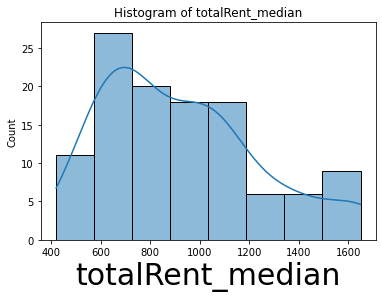

In [29]:
#Creates a Histogram with the wished column:
histx=input_uni4u_column_adjusted()
sns.histplot(Uni4U_Data[histx], kde = True).set_title("Histogram of "+histx)


plt.xlabel(histx, size=30)
plt.savefig("Pictures/histogram_"+histx+".jpeg")

##### 2.5. Barchart

# <font color='orange'>Choose for yourself!:</font>

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


C:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


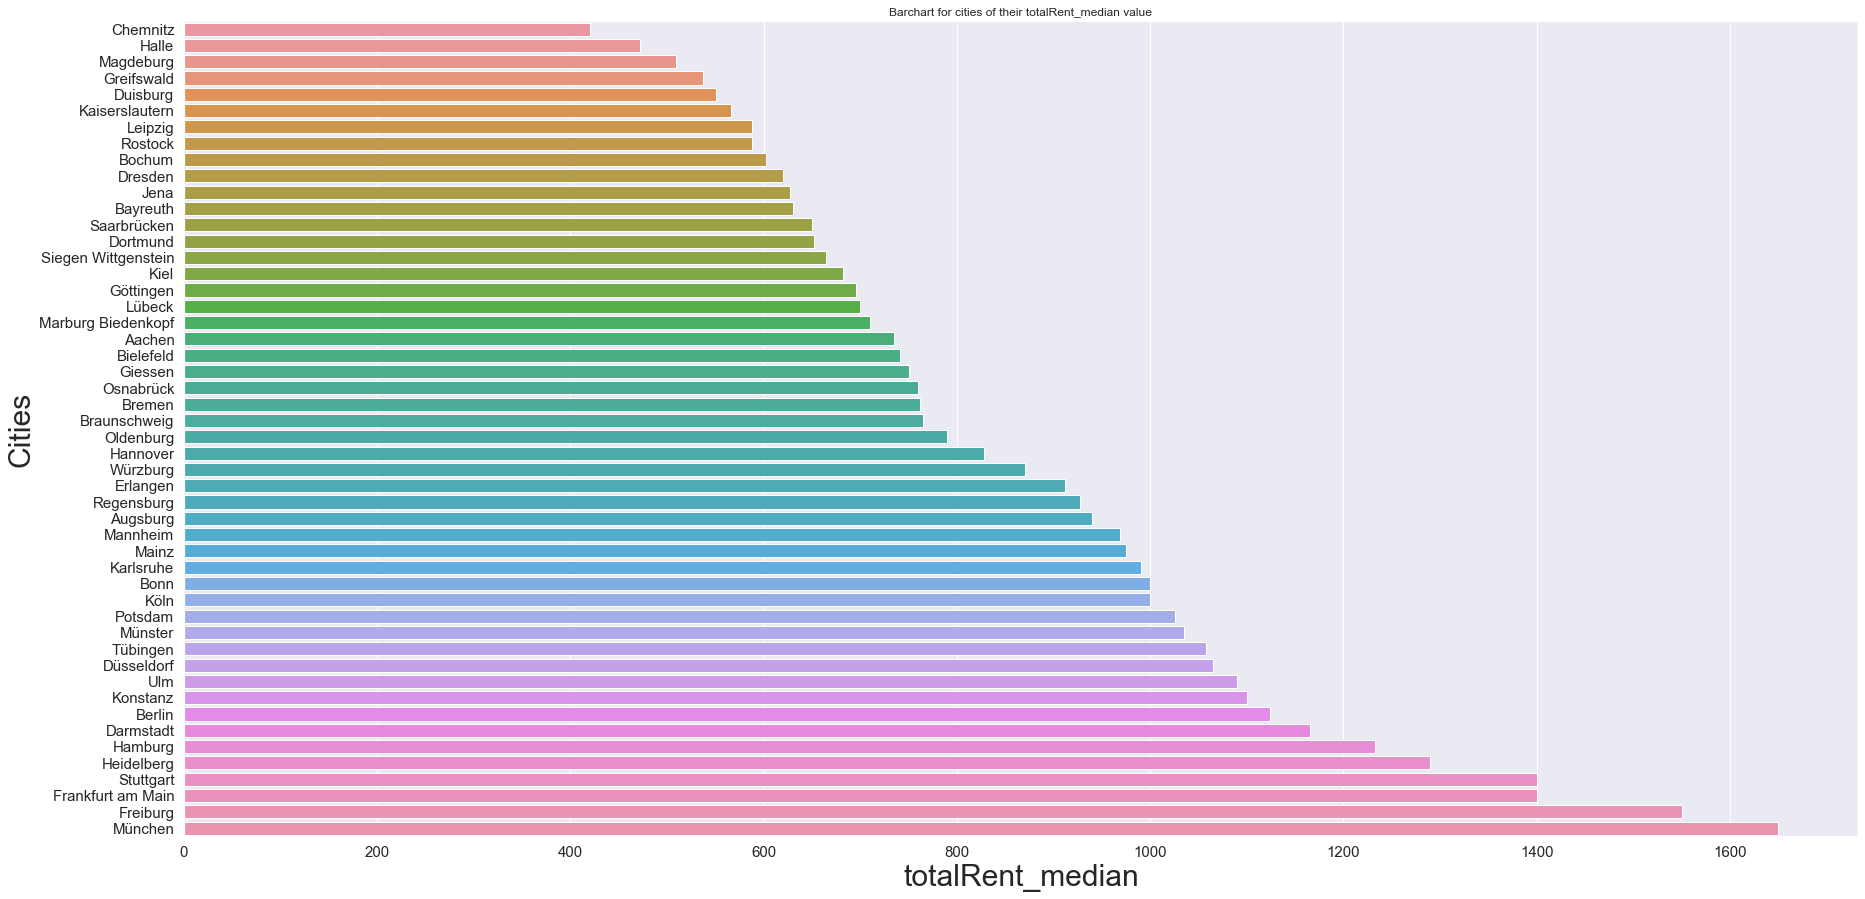

In [30]:
#Creating a barchart with the cities for wanted columns:
x=input_uni4u_column_adjusted()
y="city"  #We decided to set "city" as default value but you could also use the "institution" column.

sorted_data=Uni4U_Data.sort_values(x)


sns.set(rc = {'figure.figsize':(30,15)})
sns.barplot(x, y, data=sorted_data)

plt.xlabel(x, size=30)
plt.ylabel("Cities", size=30)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.title("Barchart for cities of their "+x+" value")
plt.savefig("Pictures/barchart_"+x+".jpeg")


##### 2.6. Boxplots

In [31]:
appartments_only_adjusteddata.columns #We need the appartments data because for the boxplots of individual cities we need non-aggregated data.

Index(['Unnamed: 0', 'regio1', 'serviceCharge', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'hasKitchen',
       'cellar', 'baseRent', 'livingSpace', 'petsAllowed', 'lift', 'noRooms',
       'garden', 'regio2', 'regio3'],
      dtype='object')

# <font color='orange'>Choose for yourself!:</font>

Oh no! Looks like there was a Problem. Please try again! Make sure you wirte the city correct
Hamburg


count     3395.000000
mean      1411.919105
std        787.941823
min          0.000000
25%        894.230000
50%       1233.000000
75%       1729.690000
max      11900.000000
Name: totalRent, dtype: float64

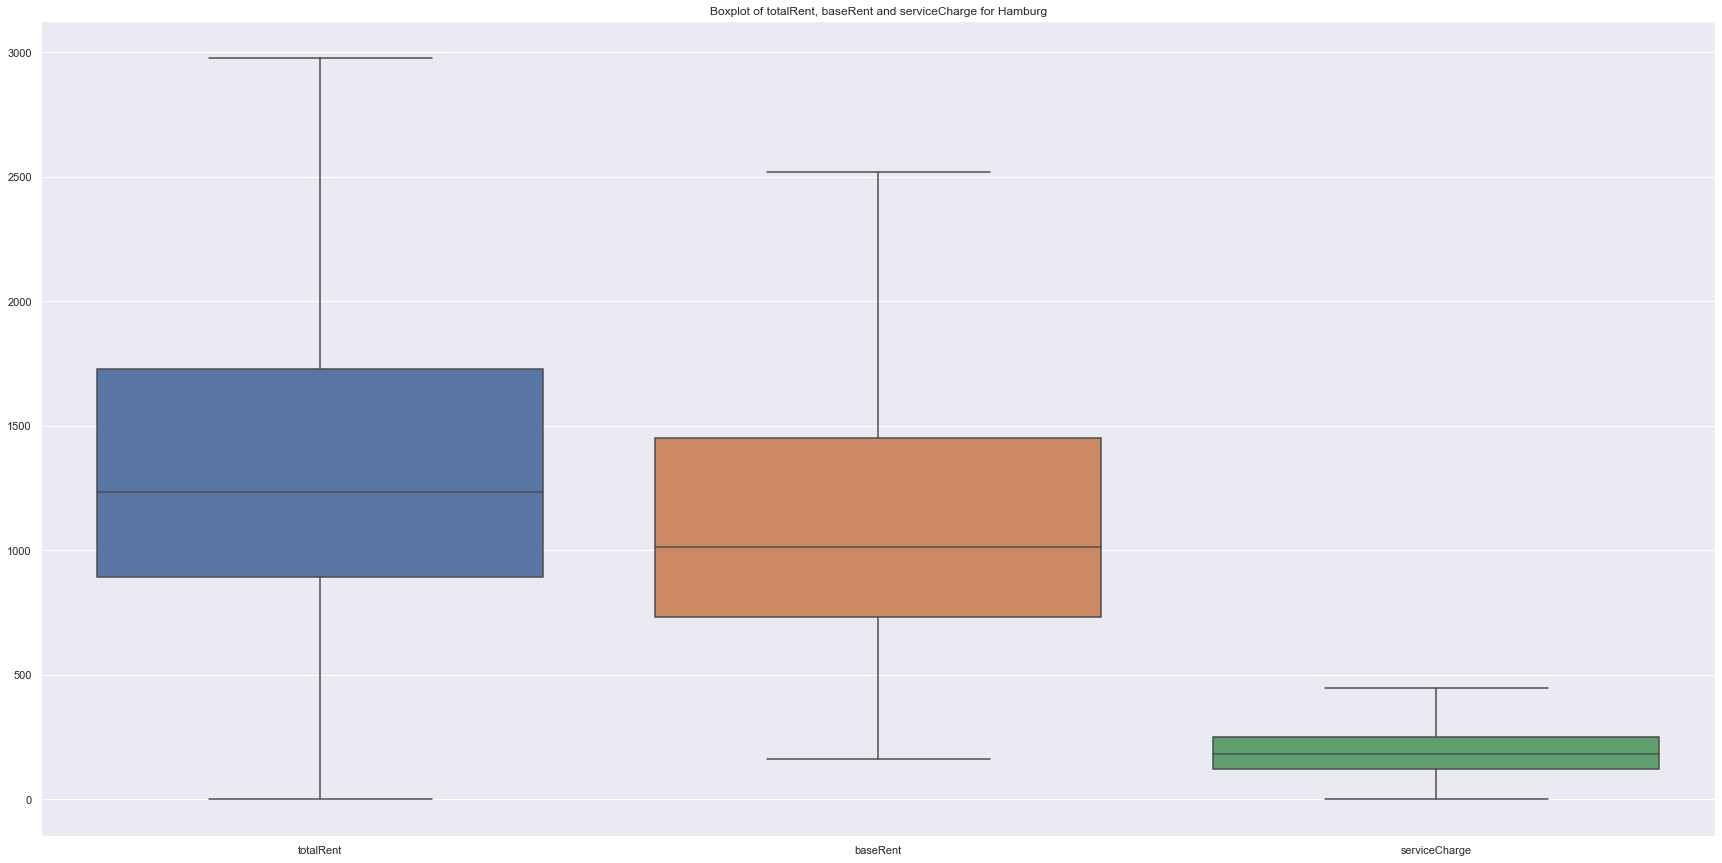

In [32]:
#Shows the boxplots of "totalRent",  "baseRent", "serviceCharge" for the choosen city to compare them.
input_city= input_city_adjusted()
searched_city=appartments_only_adjusteddata[appartments_only_adjusteddata["regio2"]== input_city]

sns.boxplot(data=searched_city.loc[:, ["totalRent",  "baseRent", "serviceCharge"]], showfliers = False) #"showfliers = False" removes all outliners (Easier to see the main Data)

plt.title("Boxplot of totalRent, baseRent and serviceCharge for "+input_city)
plt.savefig("Pictures/boxplot_"+input_city+".jpg")
print(input_city)
searched_city["totalRent"].describe()

Oh no! Looks like there was a Problem. Please try again! Make sure you wirte the city correct
Oh no! Looks like there was a Problem. totalRent has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the appartments_only_adjusteddata Dataset.
Hamburg


count     3395.000000
mean      1411.919105
std        787.941823
min          0.000000
25%        894.230000
50%       1233.000000
75%       1729.690000
max      11900.000000
Name: totalRent, dtype: float64

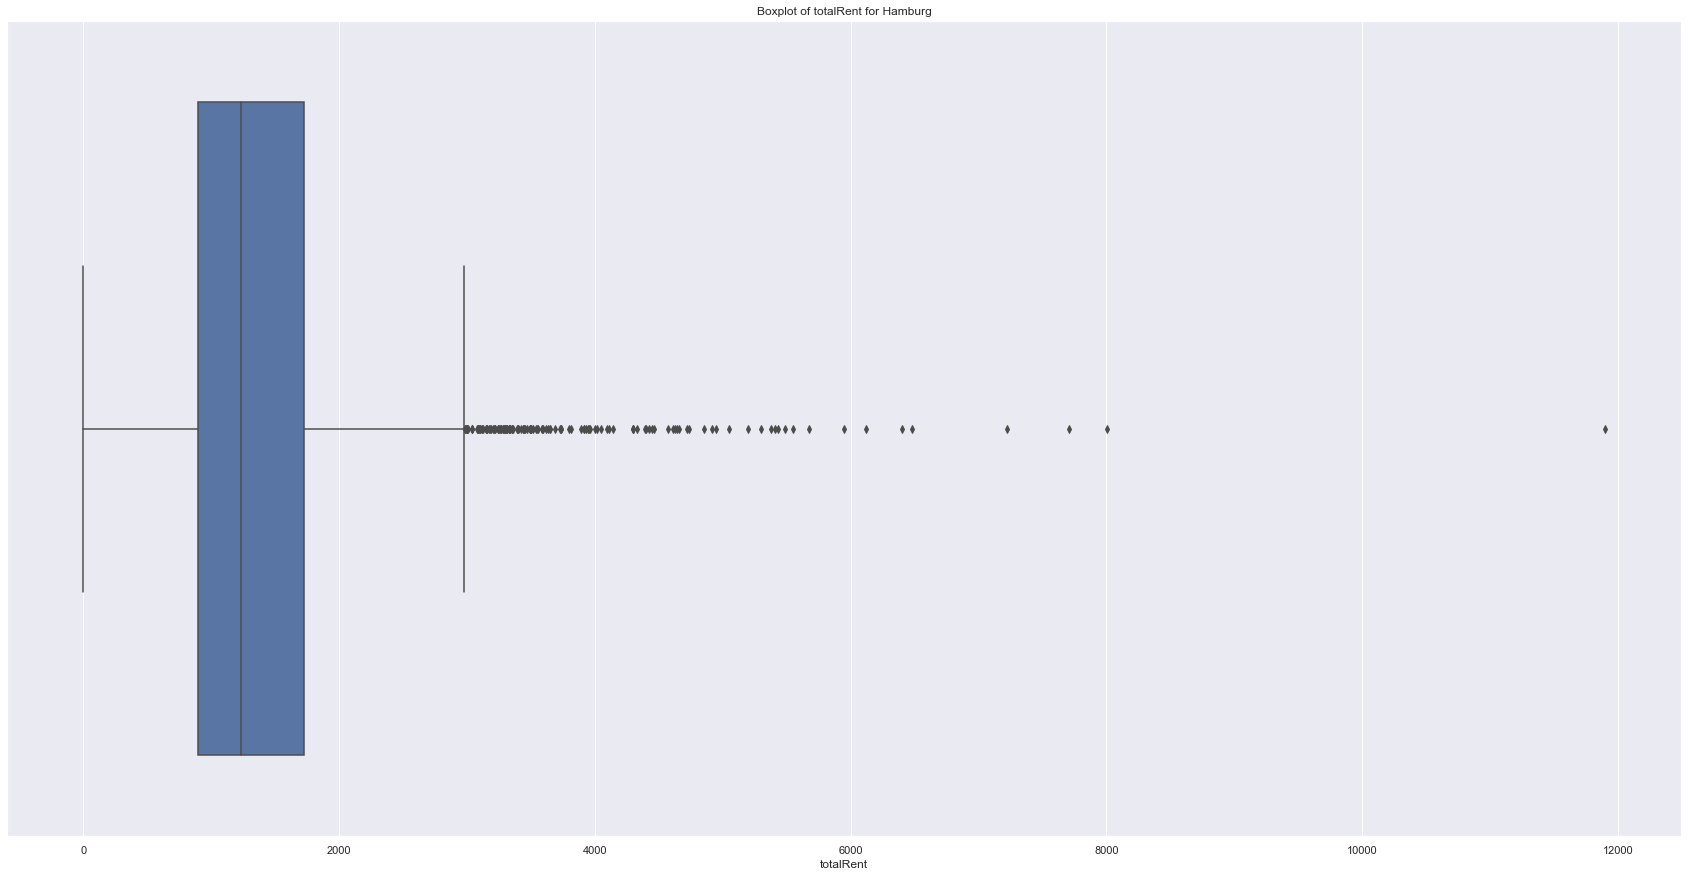

In [33]:
#Here you can get a Boxplot for the wanted city and the wanted column:
input_city=input_city_adjusted()
input_column=input_appartment_column_adjusted()

searched_city=appartments_only_adjusteddata[appartments_only_adjusteddata["regio2"]== input_city]
sns.boxplot(x=searched_city[input_column])

plt.title("Boxplot of " +input_column+" for "+input_city)
plt.savefig("Pictures/boxplot_"+input_city+"_"+input_column+ ".jpg")

print(input_city)
searched_city[input_column].describe()


##### 2.7. Correlation

C:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                  totalRent_median  national_rank
totalRent_median          1.000000      -0.585647
national_rank            -0.585647       1.000000


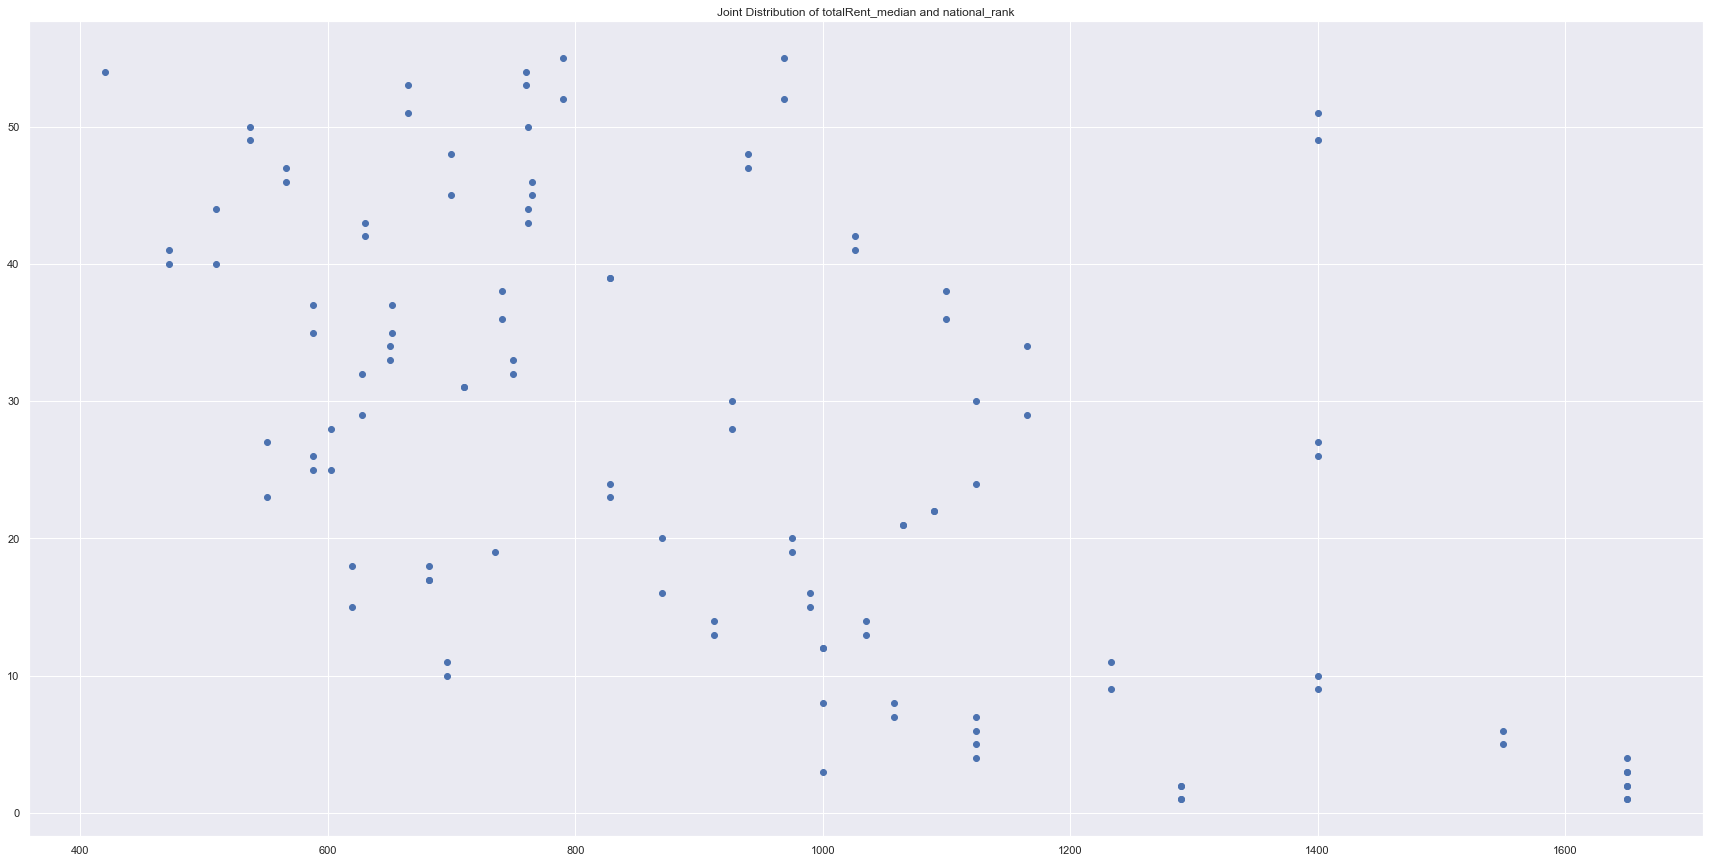

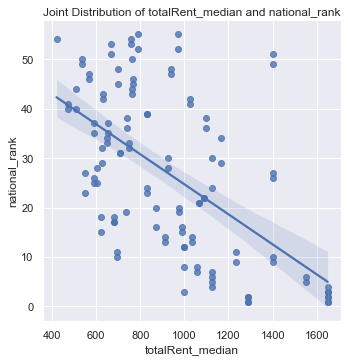

In [34]:
#Getting a visual correlation and the correlation coefficent for two columns:

#First type in the wished columns:
x="totalRent_median"
y="national_rank"

    #Only the scatterplot:
plt.scatter(x = Uni4U_Data[x], y = Uni4U_Data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=Uni4U_Data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(Uni4U_Data[[x,y]].dropna().corr())

# <font color='orange'>Choose for yourself!:</font>

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.
Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


C:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                  totalRent_median  totalRent_median
totalRent_median               1.0               1.0
totalRent_median               1.0               1.0


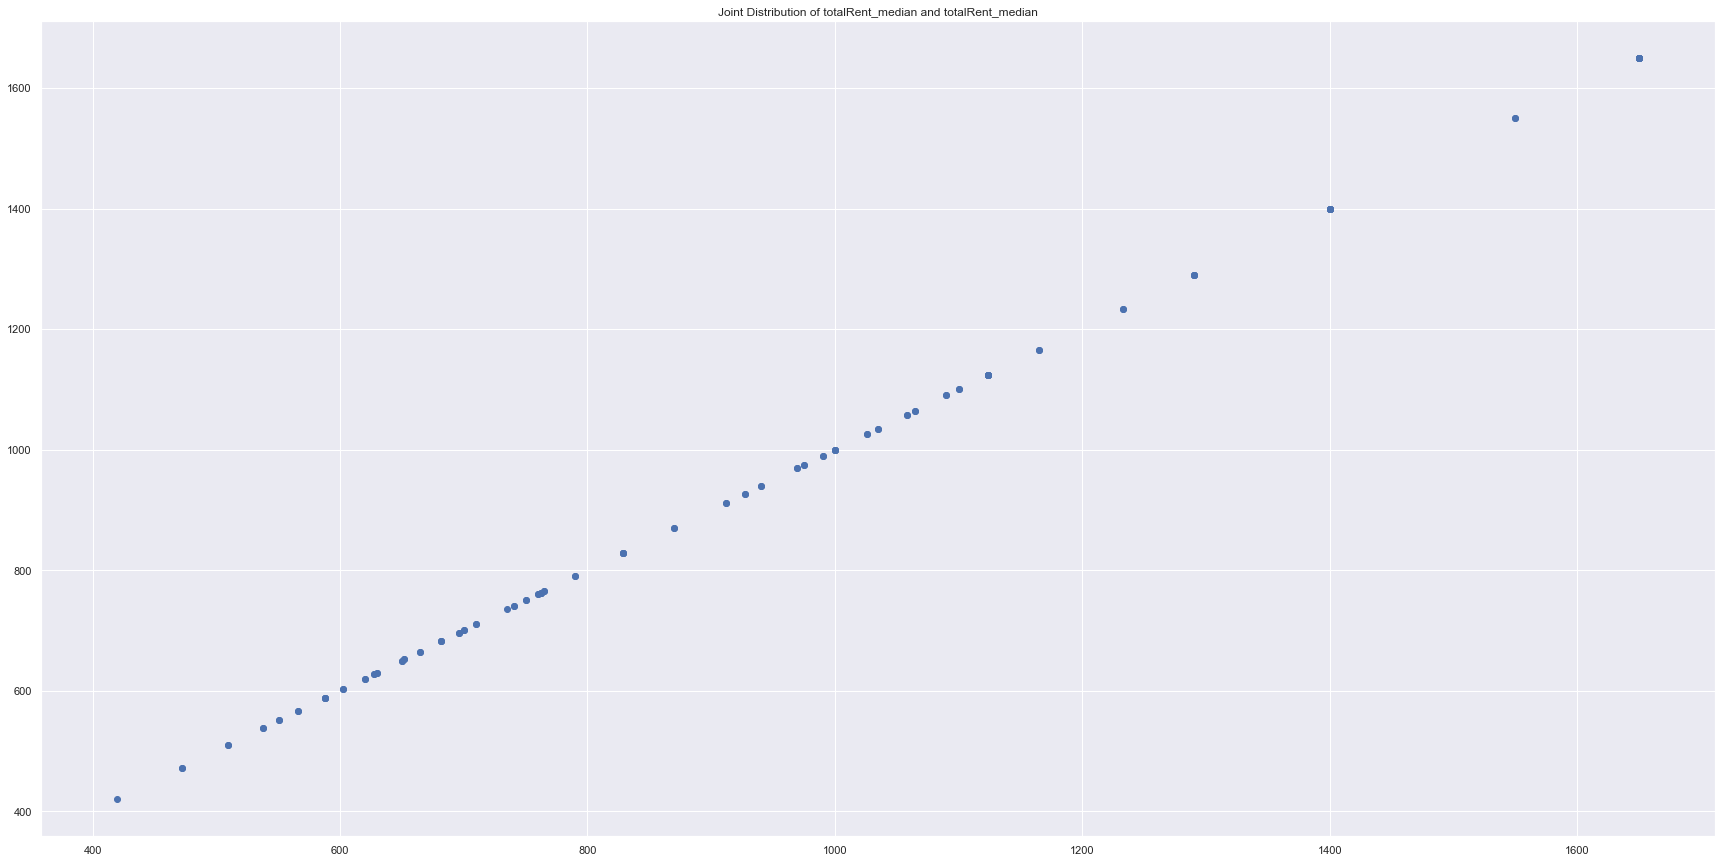

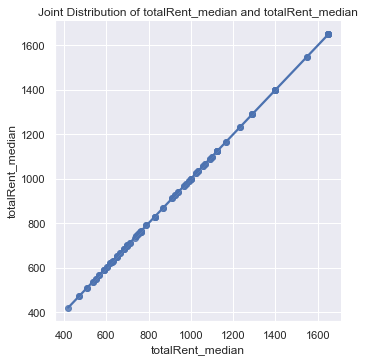

In [35]:
#Getting a visual correlation and the correlation coefficent for two wished columns:

#First type in the wished columns:
x=input_uni4u_column_adjusted()
y=input_uni4u_column_adjusted()

    #Only the scatterplot:
plt.scatter(x = Uni4U_Data[x], y = Uni4U_Data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=Uni4U_Data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(Uni4U_Data[[x,y]].dropna().corr())